F1 Score for TF-IDF only on full dataset: 0.9454638195589591


/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/m

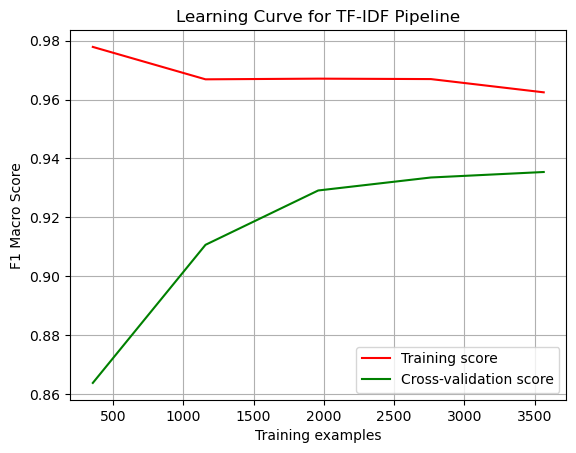

In [25]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Load the full dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.columns = ['label', 'message']

# Clean text using spaCy
nlp = spacy.load('en_core_web_sm')
def spacy_clean_text(text: str) -> str:
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(tokens)

df['tokens_message'] = df['message'].apply(spacy_clean_text)
df = df.drop(columns=['message'])
df.columns = ['Label', 'Message']

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(min_df=5, max_df=0.9, ngram_range=(1,2), max_features=1000)
X_tfidf = tfidf.fit_transform(df['Message'])
y = df['Label']

# Train-Test Split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=40)

# Train and evaluate the model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)
y_pred_tfidf = model.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='macro')
print(f"F1 Score for TF-IDF only on full dataset: {f1_tfidf}")

# Helper function to plot the learning curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='f1_macro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.figure()
    plt.title(title)
    plt.plot(train_sizes, train_scores_mean, label="Training score", color="r")
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="g")
    plt.xlabel("Training examples")
    plt.ylabel("F1 Macro Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot learning curve for TF-IDF pipeline
plot_learning_curve(model, X_train_tfidf, y_train, "Learning Curve for TF-IDF Pipeline")
